# Volume 4: Solitons

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.fft import fft, ifft

# Problem 1

Write a function that accepts the time value $t$ (which won't be used here, but will be useful later) the vector $\mathbf{y}=(y_0,y_1,\ldots,y_n,y_{-n-1},\ldots,y_{-1})$ and the vector of $k$ values and returns $\mathbf{y}'$.

In [2]:
# Function for the ODE of the coefficients
def kdv_pseudospectral_ode(t, y, k):
    """
    Given the spectral coefficients y, calculates y'.
    """
    
    return -.5*1j*k*fft(ifft(y)**2) + 1j*k**3*y

# Problem 2

Write a function that accepts an initial condition `u0`, a final time `T`, the timestep `dt`, an integer `n` for the number of coefficients to use, and another integer `skip`.
Numerically solve for the coefficients $\mathbf{y}(t)$ of a solution to the KdV equation.

Next, convert the Fourier coefficients back into function values at the gridpoints using the inverse Fourier transform.
However, only do this for every `skip`-th timestep; we will be using far more timesteps than we want to plot.
Return the gridpoints, the timesteps, and the solution $u(x,t)$.

In [3]:
# Provided function for integration
def RK4(f, y0, T, dt, k):
    """
    Solves the ODE y'=f(t, y) using the Runge-Kutta 4 method with initial 
    condition y0 on the time interval [0,T] using a time step of dt.
    The value of k is passed directly into the function f.
    
    Returns:
        t ((T,) ndarray) - the time values
        Y ((T, 2n+2) ndarray) - the solution values. The solution at the 
                i-th time step can be indexed as Y[i].
    """
    # Set up matrices for the solution
    ts = np.arange(0, T+dt, dt)
    Y = np.empty((len(ts),len(k)), dtype=complex)
    y = y0
    Y[0] = y
    for i in range(1, len(ts)):
        # Use RK4
        t = ts[i]
        K1 = f(t, y, k)
        K2 = f(t + dt/2, y + 0.5*dt*K1, k)
        K3 = f(t + dt/2, y + 0.5*dt*K2, k)
        K4 = f(t + dt, y + dt*K3, k)
        y = y + (dt / 6.) * (K1 + 2*K2 + 2*K3 + K4)
        Y[i] = y
    return ts, Y

In [4]:
def solve_kdv(u0, T, dt, n, skip):
    """
    Solve the KdV equation for x in [-pi, pi] and t in [0,T] with the given initial condition.
    
    Returns:
        t ((T,) ndarray)
        x ((2n+2,) ndarray)
        u ((T, 2n+2) ndarray)
    """
    y0 = fft(u0)
    k = np.concatenate([np.arange(0,n+1), np.arange(-n-1,0)])
    
    # Find y from RK4
    ts, y = RK4(kdv_pseudospectral_ode, y0, T, dt, k)
    
    
    # Find u and skip some
    us = np.real(ifft(y[::skip,:], axis=1))
            
    return ts[::skip], y, us
    

# Problem 3


Numerically solve the KdV equation on $[−π, π]$ with initial
conditions
$$
u(x, t = 0) = 3s\,\mathrm{sech}^2
\left(\frac{\sqrt{s}}{2}(x + a)\right),
$$
where $s = 25^2$, $a = 2$. Solve on the time domain $[0, 0.0075]$. 
Plot the solution.
How small of a timestep did you need to use for the numerical integration to be stable?

In [7]:
# Initialize everything
s = 25**2
a = 2
n = 127
domain = np.linspace(-np.pi, np.pi, 2*n+2)
T = .0075
dt = .000001
u0 = [3*s/np.cosh(np.sqrt(s)/2*(x+a))**2 for x in domain]

# Solve ODE
ts, y, u = solve_kdv(u0, T, dt, n, 20)

print(dt)

[0.000e+00 1.000e-06 2.000e-06 ... 7.498e-03 7.499e-03 7.500e-03]
1e-06


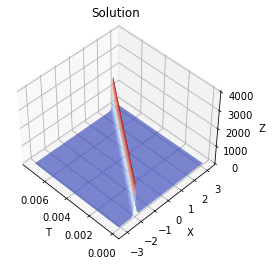

In [83]:
# Plot it
fig = plt.figure()
ax = fig.add_subplot(1,1,1,projection='3d')

T,X = np.meshgrid(ts, domain, indexing='ij')
ax.view_init(elev=45, azim=-45)
ax.set_zlim(0,4000)
ax.invert_xaxis()

ax.set_xlabel("T")
ax.set_ylabel("X")
ax.set_zlabel("Z")

ax.set_title("Solution")

ax.plot_surface(T,X,u, cmap='coolwarm', rstride=1, cstride=1)

# Problem 4

Numerically solve the KdV equation on $[−π, π]$. This time we define the initial
condition to be the superposition of two solitons,
$$
u(x,t=0) 
= 3s_1\mathrm{sech}^2\left(\frac{\sqrt{s_1}}{2}(x+a_1)\right) 
+ 3s_2\mathrm{sech}^2\left(\frac{\sqrt{s_2}}{2}(x+a_2)\right),
$$

where $s_1 = 25^2$, $a_1 = 2$, and $s_2 = 16^2$, $a_2 = 1$.
Solve on the time domain $[0, 0.0075]$. 
Plot the solution.

In [84]:
# Initialize everything
s1, s2 = 25**2, 16**2
a1, a2 = 2, 1
n = 127
domain = np.linspace(-np.pi, np.pi, 2*n+2)
T = .0075
dt = .000001
u0 = [3*s1/np.cosh(np.sqrt(s1)/2*(x+a1))**2 + 3*s2/np.cosh(np.sqrt(s2)/2*(x+a2))**2 for x in domain]

# Solve ODE
ts, y, u = solve_kdv(u0, T, dt, n, 20)

print(dt)

1e-06


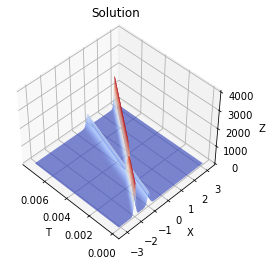

In [85]:
# Plot it
fig = plt.figure()
ax = fig.add_subplot(1,1,1,projection='3d')

T,X = np.meshgrid(ts, domain, indexing='ij')
ax.view_init(elev=45, azim=-45)
ax.set_zlim(0,4000)
ax.invert_xaxis()

ax.set_xlabel("T")
ax.set_ylabel("X")
ax.set_zlabel("Z")

ax.set_title("Solution")

ax.plot_surface(T,X,u, cmap='coolwarm', rstride=1, cstride=1)

# Problem 5

Consider again the ODE for the spectral coefficients.
The linear term in this equation is $i\mathbf{k}^3\mathbf{y}$.
This term contributes much of the exponential growth in the ODE, and contributes to how short the time step must be to ensure numerical stability.
Make the substitution $z_k(t) = e^{-ik^3t}y_k(t)$ and find a similar ODE for $\mathbf{z}$.
This essentially allows the exponential growth to be scaled out (it's solved for analytically, replacing it with rotation in the complex plane).

Use the resulting equation to solve the previous problem.
How much larger of a timestep can you use while this method remains stable?

In [29]:
# Function for the ODE of the coefficients
def kdv_pseudospectral_ode_for_5(t, y, k):
    """
    Given the spectral coefficients y, calculates y'.
    """
    
    return -.5*1j*k*np.exp(-1j*k**3*t)*fft(ifft(y/np.exp(-1j*k**3*t))**2)

def solve_kdv_for_5(u0, T, dt, n, skip):
    """
    Solve the KdV equation for x in [-pi, pi] and t in [0,T] with the given initial condition.
    
    Returns:
        t ((T,) ndarray)
        x ((2n+2,) ndarray)
        u ((T, 2n+2) ndarray)
    """
    y0 = fft(u0)
    k = np.concatenate([np.arange(0,n+1), np.arange(-n-1,0)])
    
    # solve for z
    ts, z = RK4(kdv_pseudospectral_ode_for_5, y0, T, dt, k)
    
    # Convert z to y
    y = z/np.exp(-1j*k.reshape(1,-1)**3*ts.reshape(-1,1))
            
    us = np.real(ifft(y[::skip,:], axis=1))
            
    return ts[::skip], y, us

In [40]:
# Initialize everything
s1, s2 = 25**2, 16**2
a1, a2 = 2, 1
n = 127
domain = np.linspace(-np.pi, np.pi, 2*n+2)
T = .0075
dt = 3e-6
u0 = [3*s1/np.cosh(np.sqrt(s1)/2*(x+a1))**2 + 3*s2/np.cosh(np.sqrt(s2)/2*(x+a2))**2 for x in domain]

# solve my ode
ts, y, u = solve_kdv_for_5(u0, T, dt, n, 20)

print(dt)

3e-06


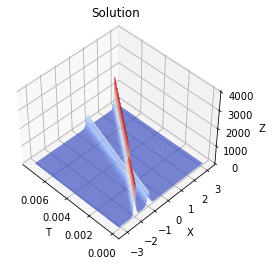

In [41]:
# Plot it
fig = plt.figure()
ax = fig.add_subplot(1,1,1,projection='3d')

T,X = np.meshgrid(ts, domain, indexing='ij')
ax.view_init(elev=45, azim=-45)
ax.set_zlim(0,4000)
ax.invert_xaxis()

ax.set_xlabel("T")
ax.set_ylabel("X")
ax.set_zlabel("Z")

ax.set_title("Solution")

ax.plot_surface(T,X,u, cmap='coolwarm', rstride=1, cstride=1)

dt is bigger by a factor of 3